<h1>Bienvenido al cuaderno para comprender cómo resolvemos los Sudokus</h1>
Este cuaderno Jupyter y el resto con los que vamos a trabajar con Sudokus nos van a ayudar a mostrar a tratar de resolverlos utilizando diferentes técnicas. El <b>objetivo</b> es comprender cómo podemos <b>diseñar un algoritmo</b> para resolver el Sudoku y luego poder comparar este algoritmo con otros tipos de estrategias.

<h2>Qué 3 condiciones debe cumplir un Sudoku bien resuelto</h2>
<ul>
    <li>No se puede repetir ningún número del 1 al 9 en ninguna columna</li>
    <li>No se puede repetir ningún número del 1 al 9 en ninguna fila</li>
    <li>No se puede repetir ningún número del 1 al 9 en ningún tablero</li>
</ul>
Si un Sudoku cumple estas 3 condiciones lo podemos considerar como <b>bien resuelto</b>. A continuación puedes ver un ejemplo de cómo se vería la matriz del Sudoku por la salida estándar (consola) y cómo se verían el Tablero 1 y el Tablero 9 de ese mismo Sudoku.
<br><br>

In [31]:
# Definir la matriz de Sudoku de ejemplo
sudoku = [
    [6, 1, 3, 7, 2, 8, 5, 4, 9],
    [2, 5, 7, 9, 4, 6, 8, 3, 1],
    [9, 8, 4, 1, 3, 5, 6, 7, 2],
    [5, 6, 1, 4, 7, 3, 9, 2, 8],
    [3, 7, 8, 2, 6, 9, 4, 1, 5],
    [4, 2, 9, 5, 8, 1, 7, 6, 3],
    [7, 4, 5, 8, 1, 2, 3, 9, 6],
    [1, 9, 6, 3, 5, 7, 2, 8, 4],
    [8, 3, 2, 6, 9, 4, 1, 5, 7]
]

# Tablero 1 del Sudoku anterior
tablero1 = [
    [6, 1, 3],
    [2, 5, 7],
    [9, 8, 4]
]

tablero9 = [
    [3, 9, 6],
    [2, 8, 4],
    [1, 5, 7]
]

# Mostrar el Sudoku de forma legible con saltos de línea
print("Sudoku")
print("------------------")
for fila in sudoku:
    print(fila)

# Mostrar el Tablero 1 de forma legible con saltos de línea
print("\nTablero 1")
print("------------------")
for fila in tablero1:
    print(fila)

# Mostrar el Tablero 9 de forma legible con saltos de línea
print("\nTablero 9")
print("------------------")
for fila in tablero9:
    print(fila)

Sudoku
------------------
[6, 1, 3, 7, 2, 8, 5, 4, 9]
[2, 5, 7, 9, 4, 6, 8, 3, 1]
[9, 8, 4, 1, 3, 5, 6, 7, 2]
[5, 6, 1, 4, 7, 3, 9, 2, 8]
[3, 7, 8, 2, 6, 9, 4, 1, 5]
[4, 2, 9, 5, 8, 1, 7, 6, 3]
[7, 4, 5, 8, 1, 2, 3, 9, 6]
[1, 9, 6, 3, 5, 7, 2, 8, 4]
[8, 3, 2, 6, 9, 4, 1, 5, 7]

Tablero 1
------------------
[6, 1, 3]
[2, 5, 7]
[9, 8, 4]

Tablero 9
------------------
[3, 9, 6]
[2, 8, 4]
[1, 5, 7]


<h2>Cómo calcular que una fila, columna o tablero está bien resuelto</h2>
Hay una serie de datos curiosos que podríamos utilizar a la hora de saber si una fila, columna o tablero está resuelto:
<ol>
    <li>Cada fila, columna y tablero está compuestos de 9 números</li>
    <li>Tinen que ser números del 1 al 9 sin repetir</li>
</ol>
<br>
Vamos a usar 2 estrategias a la hora de saber si las filas, columnas o tableros están bien resueltos:
<ul>
    <li>Revisar si un número está repetido en la lista</li>
    <li>Utilizar los conjuntos de Python y comparar el conjunto [1,2,3,4,5,6,7,8,9] con el que usamos</li>
</ul>
Vamos a ver con el código para analizar cómo funciona cada estrategia. En el caso de los tableros vamos a convertirlos a una lista de 1 dimensión para que así podamos trabajar tanto con filas, columnas y tableros como si fueran un array de 9 posiciones. En el siguiente ejemplo con el cual vamos a ver las dos estrategias ya estaremos utilizando arrays de 9 posiciones para facilitar la comprensión. 
<br><br>
<b>NOTA: </b> Para comprender cómo un algoritmo es mejor que otro debemos conocer la <b>Notación Big O</b> ya que nos permite comparar los algoritmos entre sí con una notación matemática que nos da información acerca de cada uno de los planteamientos. Si desconoces cómo funciona esta notación te dejo un enlace que puedes visitar.
<a href="https://www.freecodecamp.org/espanol/news/hoja-de-trucos-big-o/#:~:text=La%20notaci%C3%B3n%20Big%20O%20es,el%20tama%C3%B1o%20de%20su%20entrada.">Qué es la Notación Big O [Freecodecamp]</a>
<br><br>

In [32]:
# Primera estrategia para saber si el listado de números es válido 
# Revisar si un número está repetido
listadoValido = [9,5,3,2,1,6,8,7,4]
listadoNoValido = [9,5,3,2,1,9,8,4,8]

def esListadoValido_Repeticion(numeros):
    for i, numeroMirar in enumerate(numeros):
        for j, numero in enumerate(numeros):
            if i != j and numeroMirar == numero:
                return False
    return True

# Revisamos el listadoVálido y nos debería devolver True
print("Revisamos el listado válido: ")
print(esListadoValido_Repeticion(listadoValido))
# Revisamos el listadoNoVálido y nos debería devolver False
print("Revisamos el listado no válido: ")
print(esListadoValido_Repeticion(listadoNoValido))
print("\n")

Revisamos el listado válido: 
True
Revisamos el listado no válido: 
False




<h3>Estrategia 1: Revisar que el número no esté repetido</h3>
Si nos damos cuenta el método <i>esListadoValido_Repeticion</i> funciona de la siguiente forma:
<ol>
    <li>Revisamos cada número del listado <i>(primer bucle for)</i></li>
    <li>En cada revisión miramos que no se repita con el resto <i>(segundo bucle for)</i></li>
</ol>
Cada bucle for lleva una complejidad O(n) y al estar anidados este <b>método tiene complejidad O(n<sup>2</sup>)</b>, llamada complejidad cuadrática.

In [14]:
# Segunda estrategia para saber si el listado de números es válido 
# Comparar el listado con el conjunto [1,2,3,4,5,6,7,8,9]
listadoValido = [9, 5, 3, 2, 1, 6, 8, 7, 4]
listadoNoValido = [9, 5, 3, 2, 1, 9, 8, 4, 8]

def esListadoValido_Conjunto(numeros):
    # Crear un conjunto con los números del 1 al 9
    numeros_validos = set(range(1, 10))
    # Convertir la lista a un conjunto
    numeros_fila = set(numeros)
    # Verificar si los conjuntos son iguales
    return numeros_fila == numeros_validos

# Revisamos el listadoVálido y nos debería devolver True
print("Revisamos el listado válido: ")
print(esListadoValido_Conjunto(listadoValido))
# Revisamos el listadoNoVálido y nos debería devolver False
print("Revisamos el listado no válido: ")
print(esListadoValido_Conjunto(listadoNoValido))
print("\n")

Revisamos el listado válido: 
True
Revisamos el listado no válido: 
False




<h3>Estrategia 2: Revisar que esté en el conjunto [1,2,3,4,5,6,7,8,9]</h3>
Si nos damos cuenta el método <i>esListadoValido_Conjunto</i> funciona de la siguiente forma:
<ol>
    <li>Creamos el conjunto válido <i>(set(range(1,10))</i></li>
    <li>Crear el conjunto a partir del listado  <i>(set(numeros))</i></li>
</ol>
La primera operación tiene una complejidad de O(1) y la de crear el conjunto a partir del listado tiene complejidad O(n).
<br>
Con esta información podemos decir que la <b>complejidad de este método es O(n)</b>.

<h3>Qué estrategia/método es el mejor</h3>
En este caso tenemos dos métodos que resuelven el mismo problema pero lo hacen de formas diferentes:
<ol>
    <li>Comprobar repetición: O(n<sup>2</sup>)</li>
    <li>Comprobar conjunto: O(n)</li>
</ol>
Para entender cuál es mejor vamos a ver el siguiente gráfico de cómo son las complejidades:

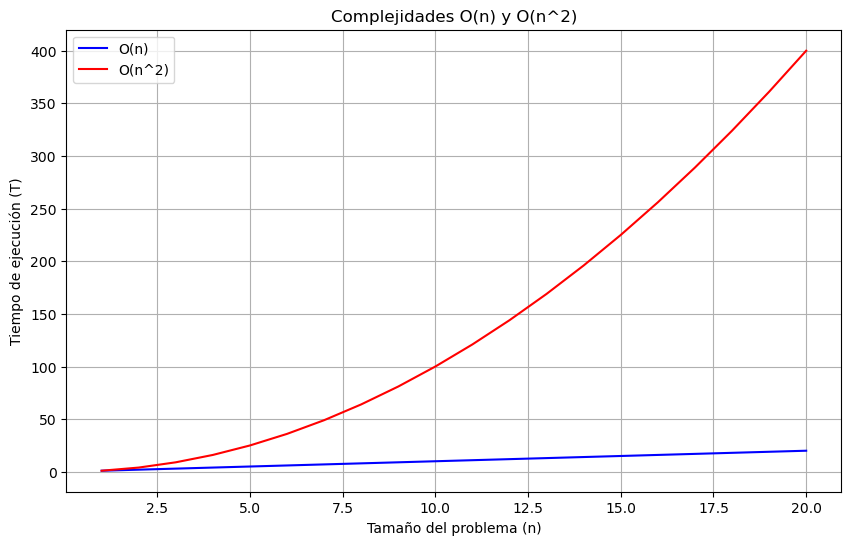

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Generar un rango de valores de n
n = np.arange(1, 21)

# Calcular las complejidades O(n) y O(n^2)
O_n = n
O_n2 = n ** 2

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(n, O_n, label='O(n)', color='blue')
plt.plot(n, O_n2, label='O(n^2)', color='red')

# Agregar títulos y etiquetas
plt.title('Complejidades O(n) y O(n^2)')
plt.xlabel('Tamaño del problema (n)')
plt.ylabel('Tiempo de ejecución (T)')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

Como podemos observar en la gráfica, la <b>complejidad lineal O(n)</b> nos permite tratar los elementos en menor tiempo que la <b>complejidad cuadrática O(n<sup>2</sup>)</b> por lo que la estrategia 2, la del conjunto, es la más óptima.
<br><br>
Podríamos pensar que al trabajar con arrays de 9 elementos el tiempo no se diferenciaría en exceso, pero cuando se empiezan a acumular muchas operaciones las complejidades se van sumando por lo que es, siempre que podamos, interesante utilizar el algoritmo más óptimo para cada caso en el que estemos trabajando.
<br><br>
Comprendida esta primera parte de cómo comparar algoritmos, vamos a empezar a construir nuestra solución para resolver Sudokus 😊